# ITS307 Data Analytics : Autumn Semester 2022
# ClassWork 

# Supervised Learning 


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [35]:
import pandas as pd

In [36]:
import numpy as np

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading and Cleaning with Pandas

In [38]:
data = pd.read_csv('train-data.csv')
data.keys()
tdf = pd.DataFrame(data)

In [39]:
tdf.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [40]:
text = "26.6 km/kg"
x=text.split()
y = x[0]
print(x)

['26.6', 'km/kg']


In [41]:
tdf[['Mileage','Mileagestr']] = tdf.Mileage.str.split(expand=True)
tdf

Unnamed: 0                              Name    Location  Year  \
0              0            Maruti Wagon R LXI CNG      Mumbai  2010   
1              1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2              2                      Honda Jazz V     Chennai  2011   
3              3                 Maruti Ertiga VDI     Chennai  2012   
4              4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...          ...                               ...         ...   ...   
6014        6014                  Maruti Swift VDI       Delhi  2014   
6015        6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
6016        6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
6017        6017                Maruti Wagon R VXI     Kolkata  2013   
6018        6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type Mileage   Engine  \
0                 72000       CNG       Manual      First    26.6   998 CC   
1                 41000    Diesel       Manual      First   19.67  1582 CC   
2                 46000    Petrol       Manual      First    18.2  1199 CC   
3                 87000    Diesel       Manual      First   20.77  1248 CC   
4                 40670    Diesel    Automatic     Second    15.2  1968 CC   
...                 ...       ...          ...        ...     ...      ...   
6014              27365    Diesel       Manual      First    28.4  1248 CC   
6015             100000    Diesel       Manual      First    24.4  1120 CC   
6016              55000    Diesel       Manual     Second    14.0  2498 CC   
6017              46000    Petrol       Manual      First    18.9   998 CC   
6018              47000    Diesel       Manual      First   25.44   936 CC   

          Power  Seats  New_Price  Price Mileagestr  
0     58.16 bhp    5.0        NaN   1.75      km/kg  
1     126.2 bhp    5.0        NaN  12.50       kmpl  
2      88.7 bhp    5.0  8.61 Lakh   4.50       kmpl  
3     88.76 bhp    7.0        NaN   6.00       kmpl  
4     140.8 bhp    5.0        NaN  17.74       kmpl  
...         ...    ...        ...    ...        ...  
6014     74 bhp    5.0  7.88 Lakh   4.75       kmpl  
6015     71 bhp    5.0        NaN   4.00       kmpl  
6016    112 bhp    8.0        NaN   2.90       kmpl  
6017   67.1 bhp    5.0        NaN   2.65       kmpl  
6018   57.6 bhp    5.0        NaN   2.50       kmpl  

[6019 rows x 15 columns]

In [42]:
tdf[['New_Price','New_Pricestr']] = tdf.New_Price.str.split(expand=True)


In [43]:
tdf.drop(columns=['Unnamed: 0', 'Mileagestr','New_Pricestr'], axis=1, inplace=True)
tdf

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type Mileage   Engine      Power  Seats  \
0          CNG       Manual      First    26.6   998 CC  58.16 bhp    5.0   
1       Diesel       Manual      First   19.67  1582 CC  126.2 bhp    5.0   
2       Petrol       Manual      First    18.2  1199 CC   88.7 bhp    5.0   
3       Diesel       Manual      First   20.77  1248 CC  88.76 bhp    7.0   
4       Diesel    Automatic     Second    15.2  1968 CC  140.8 bhp    5.0   
...        ...          ...        ...     ...      ...        ...    ...   
6014    Diesel       Manual      First    28.4  1248 CC     74 bhp    5.0   
6015    Diesel       Manual      First    24.4  1120 CC     71 bhp    5.0   
6016    Diesel       Manual     Second    14.0  2498 CC    112 bhp    8.0   
6017    Petrol       Manual      First    18.9   998 CC   67.1 bhp    5.0   
6018    Diesel       Manual      First   25.44   936 CC   57.6 bhp    5.0   

     New_Price  Price  
0          NaN   1.75  
1          NaN  12.50  
2         8.61   4.50  
3          NaN   6.00  
4          NaN  17.74  
...        ...    ...  
6014      7.88   4.75  
6015       NaN   4.00  
6016       NaN   2.90  
6017       NaN   2.65  
6018       NaN   2.50  

[6019 rows x 13 columns]

In [47]:
tdf.astype({'Mileage':'float64', 'New_Price':'float64'}).dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                object
Power                 object
Seats                float64
New_Price            float64
Price                float64
dtype: object

In [48]:
tnum = tdf.select_dtypes(include=['int64','float64'])
tnum.isnull().sum()

Year                  0
Kilometers_Driven     0
Seats                42
Price                 0
dtype: int64

In [30]:
from sklearn.impute import SimpleImputer
simple = SimpleImputer(strategy='mean')
tnumeric = simple.fit_transform(tnum)
tnumeric

array([[2.010e+03, 7.200e+04, 5.000e+00, 1.750e+00],
       [2.015e+03, 4.100e+04, 5.000e+00, 1.250e+01],
       [2.011e+03, 4.600e+04, 5.000e+00, 4.500e+00],
       ...,
       [2.012e+03, 5.500e+04, 8.000e+00, 2.900e+00],
       [2.013e+03, 4.600e+04, 5.000e+00, 2.650e+00],
       [2.011e+03, 4.700e+04, 5.000e+00, 2.500e+00]])

In [31]:
tnumeric_df = pd.DataFrame(tnumeric, columns=tnum.columns)
tnumeric_df.isnull().sum()

Year                 0
Kilometers_Driven    0
Seats                0
Price                0
dtype: int64

C:\Users\yuadh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


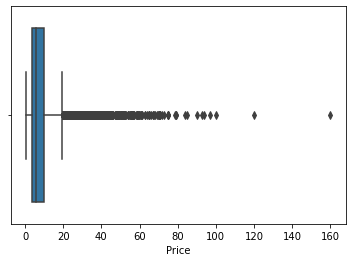

In [32]:
sns.boxplot(tnumeric_df['Price'])
plt.show()

In [33]:
q1 = tnumeric_df.Price.quantile(0.25)
q3 = tnumeric_df.Price.quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - (iqr * 1.5)
upper_limit = q3 + (iqr * 1.5)

In [34]:
trange = tnumeric_df[(tnumeric_df.Price > lower_limit) & (tnumeric_df.Price < upper_limit)]
trange.shape

(5301, 4)

In [35]:
delete = tnumeric_df[(tnumeric_df.Price < lower_limit) | (tnumeric_df.Price > upper_limit)]
delete.shape

(718, 4)

# 3.  EDA and Visualization

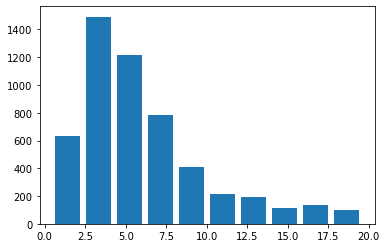

In [36]:
plt.hist(trange['Price'], bins=10, rwidth=0.8)
plt.show()

<AxesSubplot:>

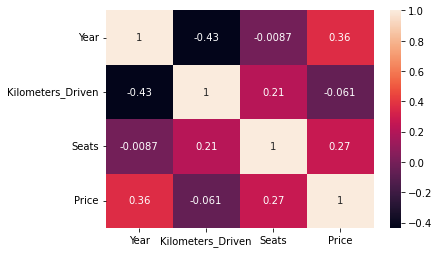

In [48]:
sns.heatmap(trange.corr(), annot=True)

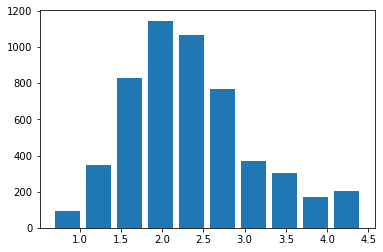

In [37]:
x = np.sqrt(trange['Price'])
plt.hist(x, bins=10, rwidth=0.8)
plt.show()

# 4. Feature Engineering 

In [38]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0,1))
pnum = mms.fit_transform(trange)
pnum

array([[0.57142857, 0.09270304, 0.5       , 0.06837161],
       [0.80952381, 0.05269421, 0.5       , 0.62943633],
       [0.61904762, 0.05914724, 0.5       , 0.21189979],
       ...,
       [0.66666667, 0.07076271, 0.8       , 0.12839248],
       [0.71428571, 0.05914724, 0.5       , 0.11534447],
       [0.61904762, 0.06043785, 0.5       , 0.10751566]])

In [39]:
pdf = pd.DataFrame(pnum, columns=trange.columns)
pdf

Year  Kilometers_Driven  Seats     Price
0     0.571429           0.092703    0.5  0.068372
1     0.809524           0.052694    0.5  0.629436
2     0.619048           0.059147    0.5  0.211900
3     0.666667           0.112062    0.7  0.290188
4     0.714286           0.052268    0.5  0.902923
...        ...                ...    ...       ...
5296  0.761905           0.035097    0.5  0.224948
5297  0.809524           0.128840    0.5  0.185804
5298  0.666667           0.070763    0.8  0.128392
5299  0.714286           0.059147    0.5  0.115344
5300  0.619048           0.060438    0.5  0.107516

[5301 rows x 4 columns]

In [42]:
cdf = tdf.select_dtypes(include=['object'])
cdf

Name    Location Fuel_Type Transmission  \
0               Maruti Wagon R LXI CNG      Mumbai       CNG       Manual   
1     Hyundai Creta 1.6 CRDi SX Option        Pune    Diesel       Manual   
2                         Honda Jazz V     Chennai    Petrol       Manual   
3                    Maruti Ertiga VDI     Chennai    Diesel       Manual   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore    Diesel    Automatic   
...                                ...         ...       ...          ...   
6014                  Maruti Swift VDI       Delhi    Diesel       Manual   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur    Diesel       Manual   
6016             Mahindra Xylo D4 BSIV      Jaipur    Diesel       Manual   
6017                Maruti Wagon R VXI     Kolkata    Petrol       Manual   
6018             Chevrolet Beat Diesel   Hyderabad    Diesel       Manual   

     Owner_Type     Mileage   Engine      Power  New_Price  
0         First  26.6 km/kg   998 CC  58.16 bhp        NaN  
1         First  19.67 kmpl  1582 CC  126.2 bhp        NaN  
2         First   18.2 kmpl  1199 CC   88.7 bhp  8.61 Lakh  
3         First  20.77 kmpl  1248 CC  88.76 bhp        NaN  
4        Second   15.2 kmpl  1968 CC  140.8 bhp        NaN  
...         ...         ...      ...        ...        ...  
6014      First   28.4 kmpl  1248 CC     74 bhp  7.88 Lakh  
6015      First   24.4 kmpl  1120 CC     71 bhp        NaN  
6016     Second   14.0 kmpl  2498 CC    112 bhp        NaN  
6017      First   18.9 kmpl   998 CC   67.1 bhp        NaN  
6018      First  25.44 kmpl   936 CC   57.6 bhp        NaN  

[6019 rows x 9 columns]

In [47]:
from sklearn.impute import SimpleImputer
simple2 = SimpleImputer(strategy='most_frequent')
cat = simple2.fit_transform(cdf)
cat

array([['Maruti Wagon R LXI CNG', 'Mumbai', 'CNG', ..., '998 CC',
        '58.16 bhp', '4.78 Lakh'],
       ['Hyundai Creta 1.6 CRDi SX Option', 'Pune', 'Diesel', ...,
        '1582 CC', '126.2 bhp', '4.78 Lakh'],
       ['Honda Jazz V', 'Chennai', 'Petrol', ..., '1199 CC', '88.7 bhp',
        '8.61 Lakh'],
       ...,
       ['Mahindra Xylo D4 BSIV', 'Jaipur', 'Diesel', ..., '2498 CC',
        '112 bhp', '4.78 Lakh'],
       ['Maruti Wagon R VXI', 'Kolkata', 'Petrol', ..., '998 CC',
        '67.1 bhp', '4.78 Lakh'],
       ['Chevrolet Beat Diesel', 'Hyderabad', 'Diesel', ..., '936 CC',
        '57.6 bhp', '4.78 Lakh']], dtype=object)

In [59]:
cat_df = pd.DataFrame(cat, columns=cdf.columns)
cat_df.isnull().sum()

Name            0
Location        0
Fuel_Type       0
Transmission    0
Owner_Type      0
Mileage         0
Engine          0
Power           0
New_Price       0
dtype: int64

In [60]:
cat_df.drop(delete.index, axis=0, inplace=True)
cat_df.shape

(5301, 9)

In [55]:
delete.index

Int64Index([  13,   19,   22,   38,   50,   62,   67,   75,   92,  107,
            ...
            5919, 5921, 5923, 5927, 5946, 5950, 5970, 5996, 6008, 6009],
           dtype='int64', length=718)

In [54]:
cat_df

Name    Location Fuel_Type Transmission  \
0               Maruti Wagon R LXI CNG      Mumbai       CNG       Manual   
1     Hyundai Creta 1.6 CRDi SX Option        Pune    Diesel       Manual   
2                         Honda Jazz V     Chennai    Petrol       Manual   
3                    Maruti Ertiga VDI     Chennai    Diesel       Manual   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore    Diesel    Automatic   
...                                ...         ...       ...          ...   
6014                  Maruti Swift VDI       Delhi    Diesel       Manual   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur    Diesel       Manual   
6016             Mahindra Xylo D4 BSIV      Jaipur    Diesel       Manual   
6017                Maruti Wagon R VXI     Kolkata    Petrol       Manual   
6018             Chevrolet Beat Diesel   Hyderabad    Diesel       Manual   

     Owner_Type     Mileage   Engine      Power  New_Price  
0         First  26.6 km/kg   998 CC  58.16 bhp  4.78 Lakh  
1         First  19.67 kmpl  1582 CC  126.2 bhp  4.78 Lakh  
2         First   18.2 kmpl  1199 CC   88.7 bhp  8.61 Lakh  
3         First  20.77 kmpl  1248 CC  88.76 bhp  4.78 Lakh  
4        Second   15.2 kmpl  1968 CC  140.8 bhp  4.78 Lakh  
...         ...         ...      ...        ...        ...  
6014      First   28.4 kmpl  1248 CC     74 bhp  7.88 Lakh  
6015      First   24.4 kmpl  1120 CC     71 bhp  4.78 Lakh  
6016     Second   14.0 kmpl  2498 CC    112 bhp  4.78 Lakh  
6017      First   18.9 kmpl   998 CC   67.1 bhp  4.78 Lakh  
6018      First  25.44 kmpl   936 CC   57.6 bhp  4.78 Lakh  

[5301 rows x 9 columns]

In [52]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ocat = ohe.fit_transform(cat_df[['Name','Location','']])
ocat

<5301x2938 sparse matrix of type '<class 'numpy.float64'>'
	with 47709 stored elements in Compressed Sparse Row format>

# 5. Training Model

# 6. Prediction

# 7. Evaluating your Model